In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


In [2]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


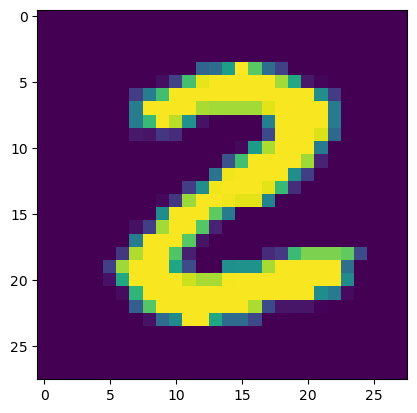

In [18]:
#For displaying an image
plt.imshow(x_train[25])
plt.show

print(y_train[25])

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data for fully connected layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer (10 classes for digits 0-9)
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7857 - loss: 0.6724 - val_accuracy: 0.9793 - val_loss: 0.0639
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9696 - loss: 0.1043 - val_accuracy: 0.9867 - val_loss: 0.0414
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9788 - loss: 0.0736 - val_accuracy: 0.9880 - val_loss: 0.0338
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9819 - loss: 0.0595 - val_accuracy: 0.9896 - val_loss: 0.0297
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9845 - loss: 0.0513 - val_accuracy: 0.9909 - val_loss: 0.0286
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9870 - loss: 0.0441 - val_accuracy: 0.9900 - val_loss: 0.0273
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0.9909 - val_loss: 0.0264
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9897 - loss: 0.0330 - 

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0317
Test accuracy: 0.9918000102043152


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


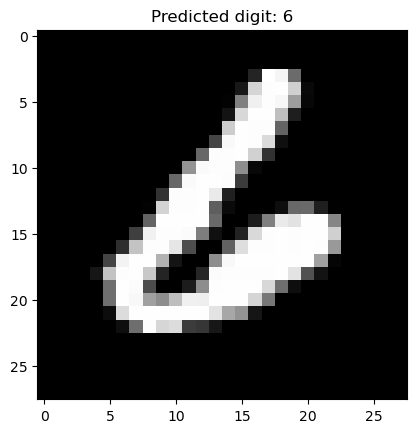

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random image from the test set
random_idx = np.random.randint(0, len(x_test))
img = x_test[random_idx]

# Reshape it for prediction
img_reshaped = img.reshape(1, 28, 28, 1)

# Predict the class
prediction = model.predict(img_reshaped)
predicted_digit = np.argmax(prediction)

# Display the image and predicted result
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f'Predicted digit: {predicted_digit}')
plt.show()


In [ ]:
model.save('digit_recognition_model.h5')
